In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [8]:
data="Titanic-Dataset.csv"
df = pd.read_csv(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df['Age'] = df['Age'].fillna(method='ffill')
df['Age'] = df['Age'].fillna(method='bfill')


/tmp/ipython-input-9-191368988.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'] = df['Age'].fillna(method='ffill')
/tmp/ipython-input-9-191368988.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'] = df['Age'].fillna(method='bfill')


In [10]:
df['Cabin'] = df['Cabin'].fillna('unknown')
print(df['Cabin'].head())

0    unknown
1        C85
2    unknown
3       C123
4    unknown
Name: Cabin, dtype: object


In [27]:
df = df.drop_duplicates()
print(df.shape)

(891, 12)


In [23]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
print(df['Sex'].head())


0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64


In [26]:
scaler = StandardScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])
print(df['Fare'].head())

0   -0.502445
1    0.786845
2   -0.488854
3    0.420730
4   -0.486337
Name: Fare, dtype: float64


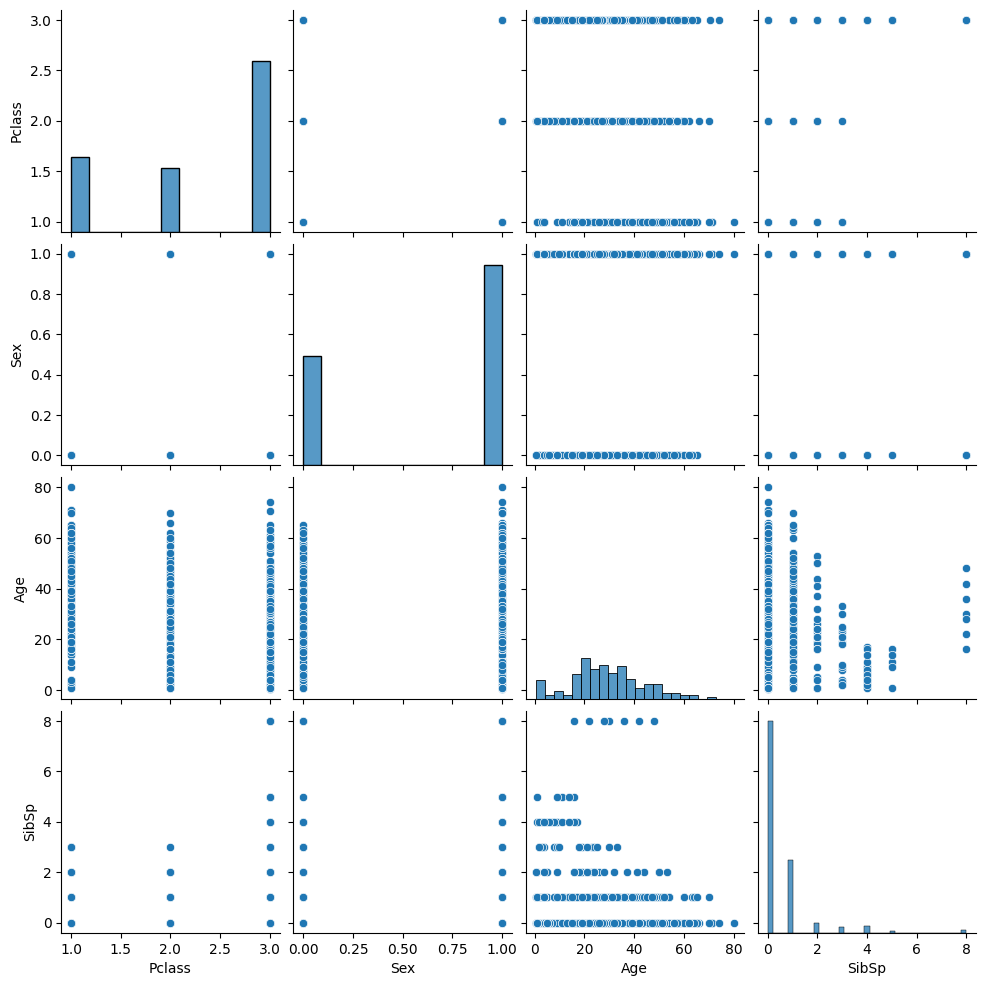

In [14]:
sns.pairplot(df[['Pclass', 'Sex', 'Age', 'SibSp']])
plt.show()


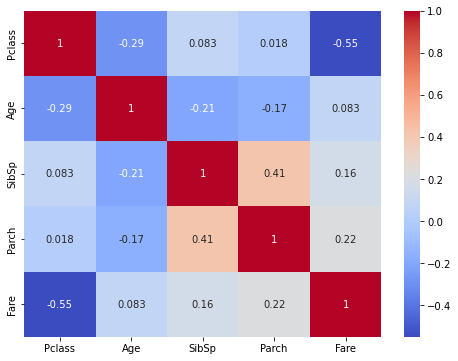

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, cmap='coolwarm')
plt.show()